In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, Markdown
# mpl.rc('text', usetex=True)
mpl.rc('font', family='Arial')
mpl.rc('font',size = 6)
mpl.rc('mathtext',fontset = 'stix')
mpl.rc('xtick', labelsize=3)
mpl.rc('ytick', labelsize=3)
mpl.rc('axes', labelsize=4)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.2)
mpl.rc('figure', figsize=(3.55/2.54, 7.5/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)
mpl.rc('savefig',pad_inches = 0.01)



cm_number = 40
cm = plt.cm.get_cmap("tab10")
colors = [
    ["#F9D5DD","#E3738B","#713948"],
    ["#DCE4FA","#8CA5EA","#495373"],
    ["#FFE8CE","#FCB462","#795B34"]
    
]
cm2 = plt.cm.get_cmap("Blues")
cm1 = plt.cm.get_cmap("Purples")
cm3 = plt.cm.get_cmap("Oranges")
Colors = [[cm1(1. / (cm_number - 1) * i) for i in range(0, cm_number)],[cm2(1. / (cm_number - 1) * i) for i in range(0, cm_number)],[cm3(1. / (cm_number - 1) * i) for i in range(0, cm_number)]]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

C:\Users\TengMa\AppData\Local\Temp\ipykernel_12552\356909261.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("tab10")
C:\Users\TengMa\AppData\Local\Temp\ipykernel_12552\356909261.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm2 = plt.cm.get_cmap("Blues")
C:\Users\TengMa\AppData\Local\Temp\ipykernel_12552\356909261.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm1 = plt.cm.get_cmap("Purples")
C:\Users\TengMa\AppData\Local\Temp\ipykernel_

In [50]:
import sys
sys.path.append("../Model")
import Model
from itertools import combinations



library = [
    lambda x:x[0],
    lambda x:x[0]*x[0],
    lambda x:x[0]*x[0]*x[0],
    lambda x:x[1],
    lambda x:x[1]*x[1],
    lambda x:x[1]*x[1]*x[1],
    lambda x:x[2],
    lambda x:x[2]*x[2],
    lambda x:x[2]*x[2]*x[2],
    lambda x:x[3],
    lambda x:x[3]*x[3],
    lambda x:x[3]*x[3]*x[3],
    lambda x:x[4],
    lambda x:x[4]*x[4],
    lambda x:x[4]*x[4]*x[4],
    lambda x:x[5],
    lambda x:x[5]*x[5],
    lambda x:x[5]*x[5]*x[5],
    lambda x:x[0]*x[1],
    lambda x:x[0]*x[2],
    lambda x:x[0]*x[3],
    lambda x:x[0]*x[4],
    lambda x:x[0]*x[5],
    lambda x:x[1]*x[2],
    lambda x:x[1]*x[3],
    lambda x:x[1]*x[4],
    lambda x:x[1]*x[5],
    lambda x:x[2]*x[3],
    lambda x:x[2]*x[4],
    lambda x:x[2]*x[5],
    lambda x:x[3]*x[4],
    lambda x:x[3]*x[5],
    lambda x:x[4]*x[5]
]
library_name = [
    lambda x,y:x,
    lambda x,y:x+x,
    lambda x,y:x+x+x,
    lambda x,y:y,
    lambda x,y:y+y,
    lambda x,y:y+y+y,
    lambda x,y:x+y,
    lambda x,y:x+x+y,
    lambda x,y:x+y+y
]
dim = 3
model = Model.WeakNO(dim,library,library_name)

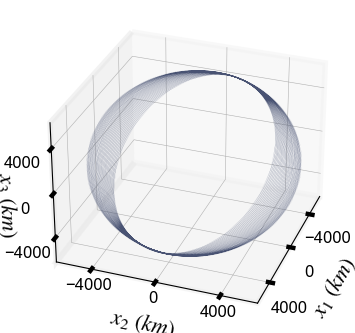

In [60]:
import pandas as pd

data = pd.read_csv('./Data/ISS/trainset.csv')
t = np.linspace(0,len(data)/15,len(data))
X = np.array([data['x'], data['y'], data['z']]).T
fig = plt.figure(figsize = (3/2.54,3/2.54))

ax = plt.axes(projection='3d')
ax.plot(data['x'], data['y'], data['z'], lw = 0.01, color = colors[1][2])
ax.set_xlim(-6000,6000)
ax.set_ylim(-6000,6000)
ax.set_zlim(-6000,6000)
ax.view_init(elev=30,    # 仰角
             azim=20    # 方位角
            )
# ax.grid(False) 
ax.tick_params(axis='x', which='major', pad=-5)
ax.tick_params(axis='y', which='major', pad=-7)
ax.tick_params(axis='z', which='major', pad=-5)
ax.set_xticks(ticks = [-4000,0,4000])
ax.set_yticks(ticks = [-4000,0,4000])
ax.set_zticks(ticks = [-4000,0,4000])
ax.yaxis._axinfo["grid"].update({"linewidth":0.1})
ax.xaxis._axinfo["grid"].update({"linewidth":0.1})
ax.zaxis._axinfo["grid"].update({"linewidth":0.1})
# ax.grid_params(linewidth = 0.1)
ax.set_xlabel(r'$x_1\ (km)$', labelpad = -14,fontsize = 4)
ax.set_ylabel(r'$x_2\ (km)$', labelpad = -16,fontsize = 4)
ax.set_zlabel(r'$x_3\ (km)$', labelpad = -16,fontsize = 4)
plt.subplots_adjust(left = 0.2,top = 0.8)
plt.savefig('./Fig/ISSdata.svg',dpi = 600,transparent = True)

In [61]:
model.Get_frequency(X,t)
for i in range(model.dims):
    print("X_%d,Identifed result: %.4f"%(i,model.frequencys[i]))
    # print("X_%d,Ground Truth: %.4f" %(i,omega0))

X_0,Identifed result: 4.0483
X_1,Identifed result: 4.0483
X_2,Identifed result: 4.0483


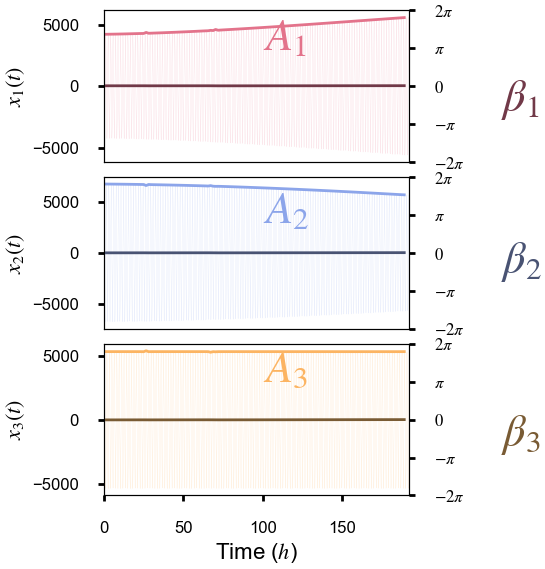

In [62]:
model.Get_Evolution(smooth_window = 20)
fig,axes = plt.subplots(model.dims,1, figsize = (2.5/2.54,4/2.54))
plt.subplots_adjust(hspace = 0.1)
for i in range(model.dims):
    ax = axes[i]

    ax.plot(t, X[:,i],lw = 0.05,color = colors[i][0],label = "\epsilon = 1e-3")
    ax.plot(model.t_evolutions[:],model.evolutions[0,i,:], color = colors[i][1],lw = .5)
    ax.set_xlim(0,t[-1])
    if i<2:
        ax.set_xticks([])
    else:
        ax.set_xlabel('Time ($h$)')
    # ax.set_yticks([])
    ax.set_ylabel(r"$x_%d(t)$"%(i+1))
    ax.text(100,3000,"$A_%d$"%(i+1), color = colors[i][1],fontsize = 8)
    ax.text(250,-2000,r"$\beta_%d$"%(i+1), color = colors[i][2],fontsize = 8)

    
    ax2 = ax.twinx()
    ax2.set_yticks(np.linspace(-2*np.pi,2*np.pi,5))
    ax2.set_yticklabels([r"$-2\pi$",r'$-\pi$','$0$','$\pi$',r'$2\pi$'])
    # ax.set_xlim(0,300)
    ax2.set_ylim(-2*np.pi, 2*np.pi)
    ax.tick_params(direction='out',width = 0.5,length = 1)
    ax2.tick_params(direction='out',width = 0.5,length = 1)
    ax2.plot(model.t_evolutions[:],np.radians(model.evolutions[1,i,:]), lw = .5,color = colors[i][2],ls = "-")
    # ax2.set_ylim(-np.pi, np.pi)
    ax2.set_xlim(0,t[-1])

plt.savefig("Fig/Evolution.svg",dpi = 600,transparent = True,bbox_inches="tight")

In [63]:
model.Library_rebuild()

(121, 2, 33, 3)


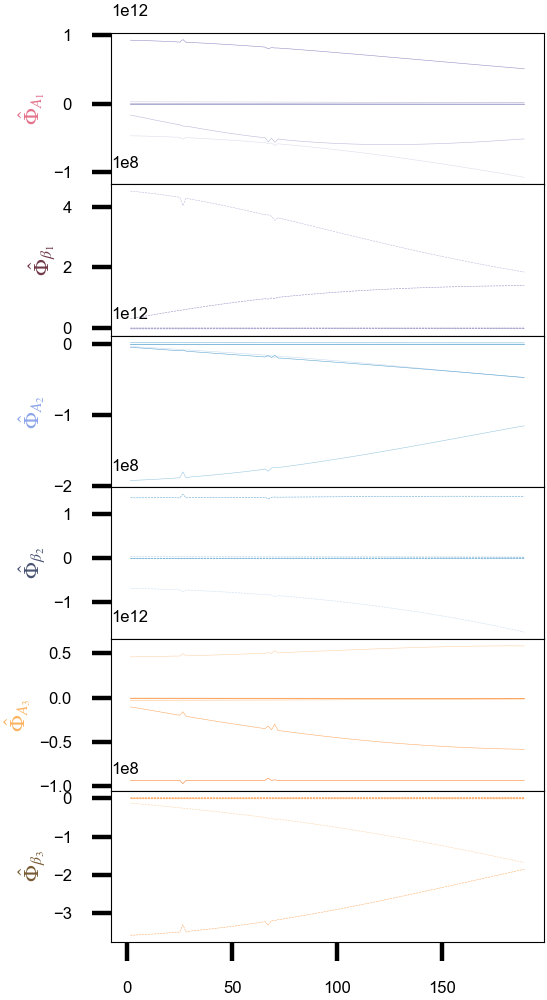

In [64]:
fig,axes = plt.subplots(model.dims*2,1)
plt.subplots_adjust(hspace = 0)
Titles = [r"A",r"\beta"]
lss = ['-','--']
print(np.shape(model.Phi))
# ax2 = ax.twinx()
for d in range(model.dims):
    for i in range(2):
        ax = axes[2*d+i]
        for j in range(len(model.library)):
            # print(np.max(np.abs(model.Phi[:,i,j,d])))
            if np.max(np.abs(model.Phi[:,i,j,d]))>1e-2:
                # c += 1
                # print(i,j,d)
                ax.plot(model.t_evolutions[:], model.Phi[:,i,j,d], color = Colors[d][j+4], ls = lss[i], lw = 0.1)
        # ax2.plot(model.t_evolutions, model.Phi[:,1,j,0], color = Colors[1][j+4], ls = '--', lw = 0.7)
        # ax.set_xticks([])
        # ax.set_yticks([])
        # ax.set_ylim(-1.1,1.1)
        ax.set_ylabel(r"$\hat{\Phi}_{%s_%d}$"%(Titles[i],d+1),color = colors[d][i+1])
plt.savefig("Fig/Library.svg",dpi = 600,transparent = True,bbox_inches="tight")

In [65]:
model.optimize(sparse_threshold = 0.1,
                           stop_tolerance = 1e-1,
                           step_tolerance=  1e-1,
                           w_A2b=10,
                           smooth_window=10)
print(model.Xi)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.         -0.00719687  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.00719947  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0

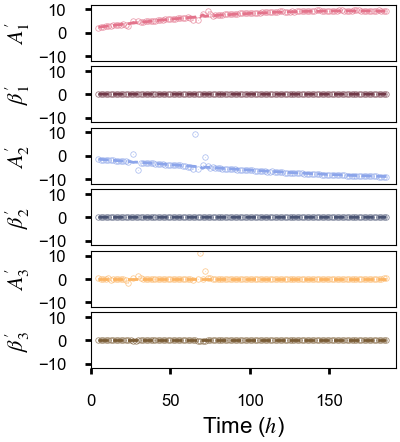

In [66]:
dt = model.t_evolutions[1] - model.t_evolutions[0]
fig,axes = plt.subplots(model.dims*2,figsize = (2.5/2.54,3/2.54))
plt.subplots_adjust(hspace = 0)
plt.subplots_adjust(hspace = 0.1)
for d in range(model.dims):
    for i in range(2):
        ax = axes[2*d+i]
        ax.tick_params(direction='out',width = 0.5,length = 1)
    # ax2.tick_params(direction='out',width = 0.5,length = 1)
        ax.scatter(model.t_evolutions[2:-2],np.gradient(model.evolutions[i,d,:],dt,edge_order=2)[2:-2], s=0.02,alpha = 0.7,color = colors[d][1+i],ls = "-",label = r"True $dA/dt$")
        ax.plot(model.t_evolutions[2:-2],np.dot(model.Phi[2:-2,i,:,d],model.Xi[d]),  lw = 0.5,alpha = 1,color = colors[d][1+i],ls = "--",label = r"Fitting $dA/dt$")
        ax.set_xlim(0,t[-1])
        ax.set_ylim(-12,12)
        ax.set_ylabel(r"$%s_%d'$"%(Titles[i],d+1))
        if d<2 or i == 0:
            ax.set_xticks([])
        else:
            ax.set_xlabel('Time ($h$)')
        # ax.set_yticks([])

plt.savefig("Fig/ISSEvolutionODE.svg",dpi = 600,transparent = True,bbox_inches="tight")

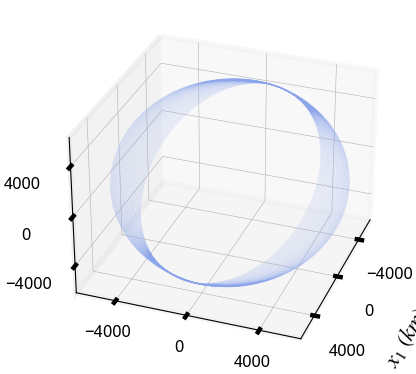

In [67]:
def WND_model(x,t):
    Phi = np.zeros(len(model.library))
    for i in range(len(model.library)):
        Phi[i] = model.library[i](x)
    dxdt = [x[1], -model.frequencys[0]**2*x[0]-np.sum(Phi*model.Xi[0]),x[3], -model.frequencys[1]**2*x[2]-np.sum(Phi*model.Xi[1]), x[5], -model.frequencys[1]**2*x[4]-np.sum(Phi*model.Xi[2])]
    return dxdt


x0 = [data['x'][0], data['u'][0]*60*60,  data['y'][0], data['v'][0]*60*60, data['z'][0], data['w'][0]*60*60]
# x0 = [data['x'][0], 0, data['y'][0], 0]

WND_predict = odeint(WND_model, y0 = x0,t = t)
fig = plt.figure(figsize = (3/2.54,3/2.54))

ax = plt.axes(projection='3d')
ax.plot(WND_predict[:,0], WND_predict[:,2], WND_predict[:,4], lw = 0.01, color = colors[1][1])
ax.set_xlim(-6000,6000)
ax.set_ylim(-6000,6000)
ax.set_zlim(-6000,6000)
ax.view_init(elev=30,    # 仰角
             azim=20    # 方位角
            )
# ax.grid(False) 
ax.tick_params(axis='x', which='major', pad=-3)
ax.tick_params(axis='y', which='major', pad=-5)
ax.tick_params(axis='z', which='major', pad=-3)
ax.set_xticks(ticks = [-4000,0,4000])
ax.set_yticks(ticks = [-4000,0,4000])
ax.set_zticks(ticks = [-4000,0,4000])
ax.yaxis._axinfo["grid"].update({"linewidth":0.1})
ax.xaxis._axinfo["grid"].update({"linewidth":0.1})
ax.zaxis._axinfo["grid"].update({"linewidth":0.1})
# ax.grid_params(linewidth = 0.1)
ax.set_xlabel(r'$x_1\ (km)$', labelpad = -10,fontsize = 4)
ax.set_ylabel(r'$x_2\ (km)$', labelpad = -12,fontsize = 4)
ax.set_zlabel(r'$x_3\ (km)$', labelpad = -12,fontsize = 4)
# plt.subplots_adjust(left = 0.1)
plt.savefig('./Fig/ISSpredict.svg',dpi = 600,transparent = True)

In [59]:
4.0481**2

16.38711361